In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import torch
from torch import nn

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.inspection import permutation_importance

Load data

In [2]:
df = pd.read_csv('../data/features_selected.csv')
df

,days_since_debut_diff,losses_diff,wins_diff,head_target_diff,sig_strikes_ground_diff,sig_strikes_landed_diff,knockdown_avg_diff,takedowns_avg_diff,sig_strikes_standing_diff,sig_strikes_attempted_diff,takedowns_attempted_diff,takedown_defense_diff,submission_avg_diff,days_since_win_diff,leg_target_diff,winner
0,0,6,9,-199,-79,-274,0.00,-3.00,-169,-643,-80,-16,-0.63,0.0,-3,1
1,0,0,0,86,122,23,0.45,1.76,-131,-167,14,43,-0.93,0.0,-71,1
2,0,0,11,424,71,779,-0.35,-2.41,697,2503,25,34,-1.31,0.0,246,1
3,-68,2,7,-37,-7,-58,0.87,-0.01,-50,-66,3,15,0.00,0.0,-21,1
4,-68,-3,-2,-202,-73,-296,0.00,-3.35,-200,-751,-95,-34,4.79,-68.0,-24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,-4346,-7,-6,-935,-84,-1296,0.09,2.13,-1142,-3057,-9,-15,0.64,-315.0,-258,0
5829,-8,1,0,-10,-84,6,0.18,-2.38,68,131,-44,30,-0.04,413.0,27,1
5830,-1771,-3,-9,-718,-181,-1054,0.36,-1.27,-725,-1840,-49,5,0.19,7.0,-119,1
5831,-3653,-8,-12,-335,-122,-508,-0.57,-2.17,-250,-922,-50,-3,-1.37,-679.0,-66,0


In [3]:
X = df.drop('winner', axis=1)
y = df['winner']

print(X.shape, y.shape)

(5833, 15) (5833,)


Scale data

In [4]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,days_since_debut_diff,losses_diff,wins_diff,head_target_diff,sig_strikes_ground_diff,sig_strikes_landed_diff,knockdown_avg_diff,takedowns_avg_diff,sig_strikes_standing_diff,sig_strikes_attempted_diff,takedowns_attempted_diff,takedown_defense_diff,submission_avg_diff,days_since_win_diff,leg_target_diff
0,0.268011,1.275320,1.229186,-0.365819,-0.665724,-0.295531,0.037369,-1.649802,-0.197924,-0.334622,-1.424960,-0.460798,-0.602545,0.197718,0.178031
1,0.268011,0.107695,0.192882,0.456665,1.618946,0.266818,0.791653,1.055513,-0.110942,0.078956,0.486634,1.570407,-0.911765,0.197718,-0.481114
2,0.268011,0.107695,1.459476,1.432102,1.039254,1.698253,-0.549297,-1.314480,1.784368,2.398817,0.710331,1.260562,-1.303443,0.197718,2.591663
3,0.215008,0.496903,0.998896,0.101698,0.152666,0.113450,1.495652,0.049545,0.074469,0.166711,0.262936,0.606445,0.046818,0.197718,0.003551
4,0.215008,-0.476118,-0.037408,-0.374476,-0.597525,-0.337186,0.037369,-1.848723,-0.268884,-0.428459,-1.730002,-1.080488,4.984031,0.023922,-0.025529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,-3.119498,-1.254535,-0.497987,-2.489847,-0.722556,-2.230618,0.188226,1.265800,-2.425142,-2.432054,0.018903,-0.426371,0.706487,-0.607367,-2.293761
5829,0.261776,0.302299,0.192882,0.179618,-0.722556,0.234630,0.339082,-1.297429,0.344574,0.337877,-0.692860,1.122853,0.005588,1.253274,0.468830
5830,-1.112403,-0.476118,-0.843422,-1.863605,-1.825108,-1.772408,0.640796,-0.666568,-1.470620,-1.374649,-0.794541,0.262173,0.242657,0.215609,-0.946392
5831,-2.579336,-1.449139,-1.188857,-0.758302,-1.154484,-0.738594,-0.918058,-1.178077,-0.383335,-0.577034,-0.814877,-0.013244,-1.365287,-1.537688,-0.432647


Train_Test_Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
print(X_train.shape, X_test.shape)

(4666, 15) (1167, 15)


Find best models using GridSearch

In [7]:
def tune_models(model_param_list, X_train, y_train, scoring='accuracy', cv=5):
    """
    Performs GridSearchCV for each model and parameter grid.

    Args:
        model_param_list (list): List of tuples: (model_name, model_instance, param_grid)
        X_train (DataFrame): Training features
        y_train (Series or array): Training labels
        scoring (str): Scoring metric for GridSearchCV (default: 'accuracy')
        cv (int): Number of cross-validation folds (default: 5)

    Returns:
        dict: model_name -> best GridSearchCV result
    """

    best_models = {}

    start_time = time.time()

    for name, model, param_grid in model_param_list:
        start_iteration_time = time.time()
        grid = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, n_jobs=-1)
        grid.fit(X_train, y_train)

        print(f"Best score for {name}: {grid.best_score_:.4f}")
        print(f"Best parameters for {name}: {grid.best_params_}")
        end_iteration_time = time.time()
        print(f"Tuning completed in {end_iteration_time - start_iteration_time:.2f} seconds.")    

        best_models[name] = grid
    
    end_time = time.time()
    print(f"Overall tuning completed in {end_time - start_time:.2f} seconds.")

    return best_models

Parameters for each model

In [8]:
model_param_list = [
    (
        "LogisticRegression",
        LogisticRegression(),
        [
                # L2 penalty
            {
                'penalty': ['l2'],
                'C': [0.01, 0.1, 1, 10],
                'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
            },
                # L1 penalty
            {
                'penalty': ['l1'],
                'C': [0.01, 0.1, 1, 10],
                'solver': ['liblinear', 'saga']
            },
                # ElasticNet penalty
            {
                'penalty': ['elasticnet'],
                'C': [0.01, 0.1, 1, 10],
                'solver': ['saga'],
                'l1_ratio': [0.0, 0.5, 1.0]
            },
                # No penalty
            {
                'penalty': [None],
                'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
            }
        ]
    ),
    (
        "SVC",
        SVC(),
        {
            'C': [0.1, 1],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale'],
            'degree': [3] 
        }
    ),
    (
        "SGDClassifier",
        SGDClassifier(),
        {
            'alpha': [0.0001, 0.001, 0.01],
            'loss': ['hinge', 'log_loss', 'squared_hinge', 'perceptron'],
            'penalty': ['l2', 'l1', 'elasticnet'],
            'l1_ratio': [0.15, 0.5, 0.85],  # only for elasticnet
            'max_iter': [1000, 2000, 5000]
        }  
    ),
    (
        "GaussianNB",
        GaussianNB(),
        {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    ),
    (
        "KNeighborsClassifier",
        KNeighborsClassifier(),
        {
        'n_neighbors': [3, 5, 7, 9, 12, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],  # 1=Manhattan, 2=Euclidean
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40]
        }
    ),
    (
        "DecisionTreeClassifier",
        DecisionTreeClassifier(),
        {
            'criterion': ['gini'],
            'max_depth': [None, 6, 8, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2']
        }
    ),
    (
        "RandomForestClassifier",
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200],
            'criterion': ['gini'],
            'max_depth': [None, 8, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2', None]
        }
    ),
    (
        "AdaBoostClassifier",
        AdaBoostClassifier(),
        {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1]
        }
    ),
    (
        "GradientBoostingClassifier",
        GradientBoostingClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'subsample': [0.8, 1.0],
            'max_features': ['sqrt', 'log2']
        }
    ),
    (
        "XGBClassifier",
        XGBClassifier(),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0, 0.1],
            'reg_alpha': [0, 0.1],
            'reg_lambda': [1, 1.5]
        }
    )
]

In [9]:
best_models = tune_models(model_param_list, X_train, y_train, scoring='accuracy', cv=5)

Best score for LogisticRegression: 0.7274
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning completed in 13.54 seconds.
Best score for SVC: 0.7291
Best parameters for SVC: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Tuning completed in 3.76 seconds.
Best score for SGDClassifier: 0.7297
Best parameters for SGDClassifier: {'alpha': 0.01, 'l1_ratio': 0.15, 'loss': 'log_loss', 'max_iter': 5000, 'penalty': 'l2'}
Tuning completed in 23.98 seconds.
Best score for GaussianNB: 0.6723
Best parameters for GaussianNB: {'var_smoothing': 1e-09}
Tuning completed in 0.05 seconds.
Best score for KNeighborsClassifier: 0.7025
Best parameters for KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Tuning completed in 17.40 seconds.
Best score for DecisionTreeClassifier: 0.6841
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samp

Neural Network

In [10]:
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

device = "cuda" if torch.cuda.is_available() else "cpu"
device

Is CUDA supported by this system? True
CUDA version: 12.6


'cuda'

Convert X and y to numpy arrays for calculations

In [11]:
X_train_torch = torch.from_numpy(X_train.to_numpy()).type(torch.float)
y_train_torch = torch.from_numpy(y_train.to_numpy()).type(torch.float)
X_test_torch = torch.from_numpy(X_test.to_numpy()).type(torch.float)
y_test_torch = torch.from_numpy(y_test.to_numpy()).type(torch.float)

# View the first five samples
X_train_torch[:5], y_train_torch[:5]

(tensor([[ 0.2680,  0.4969, -1.1889, -0.4611, -0.4952, -0.1611,  0.1882, -2.6274,
          -0.1819, -0.0496, -2.0961, -0.4608, -0.0666,  0.1977,  0.2168],
         [-0.9737, -0.8653, -0.1526,  0.7857, -0.4611,  0.5073,  0.1379, -0.3085,
           0.8665,  1.2867,  0.2629,  0.6064, -0.3036,  0.0725, -1.2178],
         [ 1.1457, -0.2815,  0.6535,  1.3859,  2.0963,  1.4748, -0.6666,  0.4133,
           1.1343,  1.5899,  0.9950, -0.1165,  0.8920,  0.1977,  1.6126],
         [-2.6892, -1.6437, -1.0737, -1.5779, -1.1318, -2.1454,  0.2553,  0.1746,
          -2.2489, -2.7726, -2.4011, -0.7362,  1.3352, -0.0349, -3.0789],
         [ 2.0350,  0.6915,  0.6535,  0.7770,  0.0049,  1.1378, -0.6163, -0.1039,
           1.1434,  2.0426,  0.6900,  0.2277, -0.7572,  0.8239,  1.7968]]),
 tensor([0., 0., 0., 1., 1.]))

In [12]:
print(X_train_torch.shape)
print(y_train_torch.shape)

torch.Size([4666, 15])
torch.Size([4666])


In [13]:
class Deep(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.network = nn.Sequential(
        nn.Linear(input_dim, 60),
        nn.ReLU(),
        nn.Linear(60, 60),
        nn.ReLU(),
        nn.Linear(60, 120),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(120, 120),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(120, 1),
        )

    def forward(self, x):
        return self.network(x)
    
pytorch_model = Deep(input_dim=X_train_torch.shape[1]).to(device)
pytorch_model

Deep(
  (network): Sequential(
    (0): Linear(in_features=15, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=120, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): Linear(in_features=120, out_features=120, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): Linear(in_features=120, out_features=1, bias=True)
  )
)

In [14]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=0.001)

In [15]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [16]:
epochs = 80

X_train_torch, y_train_torch = X_train_torch.to(device), y_train_torch.to(device)
X_test_torch, y_test_torch = X_test_torch.to(device), y_test_torch.to(device)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):

    pytorch_model.train()

    # 1 Forward pass
    y_logits = pytorch_model(X_train_torch).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #2 Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train_torch)

    acc = accuracy_fn(y_true = y_train_torch, y_pred=y_pred)

    #3 Optimizer
    optimizer.zero_grad()

    #4 Loss backwards
    loss.backward()

    #5 Optimizer step
    optimizer.step()

    
    # Save training metrics
    train_losses.append(loss.item())
    train_accuracies.append(acc)

    # Testing
    pytorch_model.eval()
    with torch.inference_mode():
        #1 Forward pass
        test_logits = pytorch_model(X_test_torch).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2 Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test_torch)
        
        test_acc = accuracy_fn(y_true=y_test_torch,
                                y_pred=test_pred)
        
        # Save test metrics
        test_losses.append(test_loss.item())
        test_accuracies.append(test_acc)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69273, Accuracy: 52.74% | Test loss: 0.68923, Test acc: 58.44%
Epoch: 10 | Loss: 0.66004, Accuracy: 59.41% | Test loss: 0.65284, Test acc: 59.04%
Epoch: 20 | Loss: 0.60091, Accuracy: 68.99% | Test loss: 0.58165, Test acc: 70.69%
Epoch: 30 | Loss: 0.57426, Accuracy: 70.60% | Test loss: 0.56092, Test acc: 70.95%
Epoch: 40 | Loss: 0.55373, Accuracy: 72.48% | Test loss: 0.54606, Test acc: 72.24%
Epoch: 50 | Loss: 0.54510, Accuracy: 73.40% | Test loss: 0.54073, Test acc: 72.66%
Epoch: 60 | Loss: 0.53686, Accuracy: 73.92% | Test loss: 0.53744, Test acc: 73.26%
Epoch: 70 | Loss: 0.52973, Accuracy: 74.41% | Test loss: 0.53377, Test acc: 73.44%


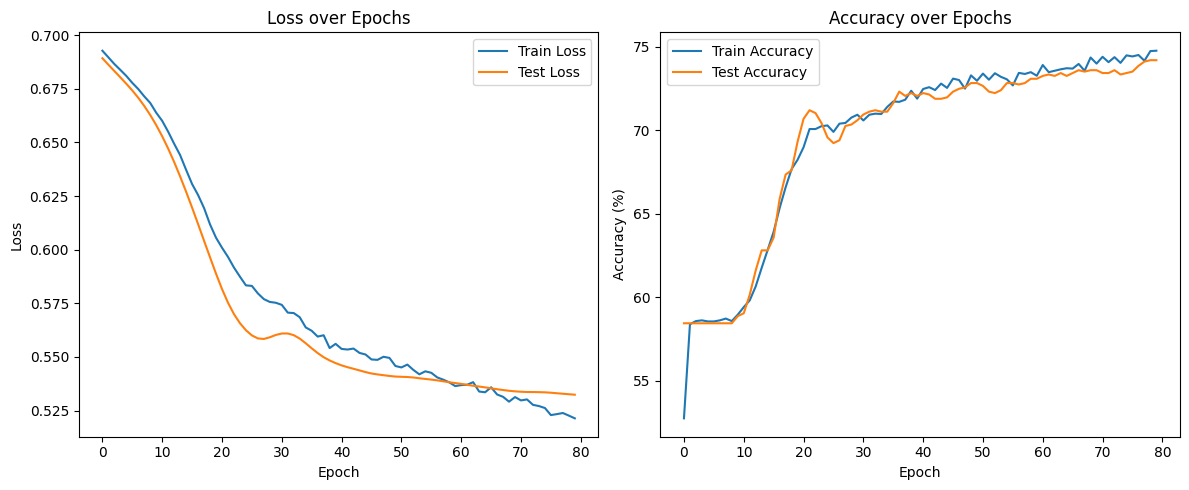

In [17]:
# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
def evaluate(model, X, y):
    model.eval()
    with torch.inference_mode():
        logits = model(X).squeeze()
        preds = torch.round(torch.sigmoid(logits))
        loss = loss_fn(logits, y)
        acc = accuracy_fn(y_true=y, y_pred=preds)
    return loss.item(), acc

test_loss, test_acc = evaluate(pytorch_model, X_test_torch, y_test_torch)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Test Loss: 0.5324, Test Accuracy: 74.21%


In [19]:
# Move data back to CPU if it's on GPU

y_true1 = y_test_torch.cpu().numpy()
y_scores1 = pytorch_model(X_test_torch).squeeze().detach().cpu()
y_pred1 = torch.round(torch.sigmoid(y_scores1)).numpy()

# Print classification report
print(classification_report(y_true1, y_pred1))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true1, y_pred1))


              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       485
         1.0       0.76      0.82      0.79       682

    accuracy                           0.74      1167
   macro avg       0.74      0.73      0.73      1167
weighted avg       0.74      0.74      0.74      1167

Confusion Matrix:
[[309 176]
 [125 557]]


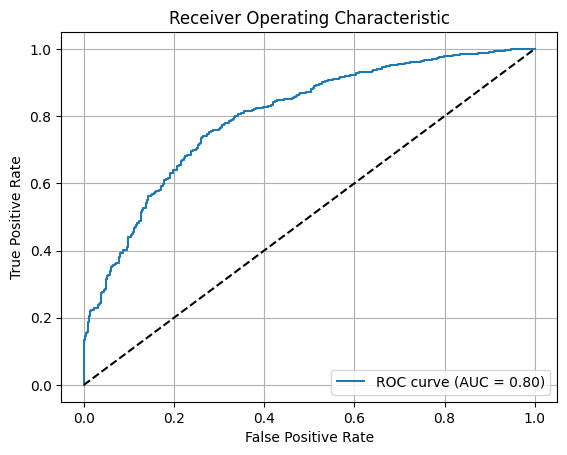

In [20]:
fpr, tpr, thresholds = roc_curve(y_true1, y_scores1.numpy())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [21]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

In [22]:
def evaluate_pytorch_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_logits = model(X_test).squeeze()
        y_probs = torch.sigmoid(y_logits)
        y_pred = torch.round(y_probs).cpu().numpy()
        y_true = y_test.cpu().numpy()

    return {
        'Model': 'Neural Network',
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred)
    }


In [23]:
results = []

for name, grid in best_models.items():
    best_model = grid.best_estimator_
    metrics = evaluate_model(name, best_model, X_test, y_test)
    results.append(metrics)

nn_metrics = evaluate_pytorch_model(pytorch_model, X_test_torch, y_test_torch)
results.append(nn_metrics)

results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1
10,Neural Network,0.742074,0.759891,0.816716,0.787279
8,GradientBoostingClassifier,0.742074,0.758480,0.819648,0.787879
7,AdaBoostClassifier,0.739503,0.746736,0.838710,0.790055
1,SVC,0.734362,0.736041,0.850440,0.789116
0,LogisticRegression,0.733505,0.738126,0.843109,0.787132
2,SGDClassifier,0.732648,0.739637,0.837243,0.785420
9,XGBClassifier,0.724936,0.744912,0.804985,0.773784
6,RandomForestClassifier,0.723222,0.742896,0.804985,0.772695
4,KNeighborsClassifier,0.701799,0.717448,0.807918,0.760000
5,DecisionTreeClassifier,0.692374,0.703657,0.818182,0.756610


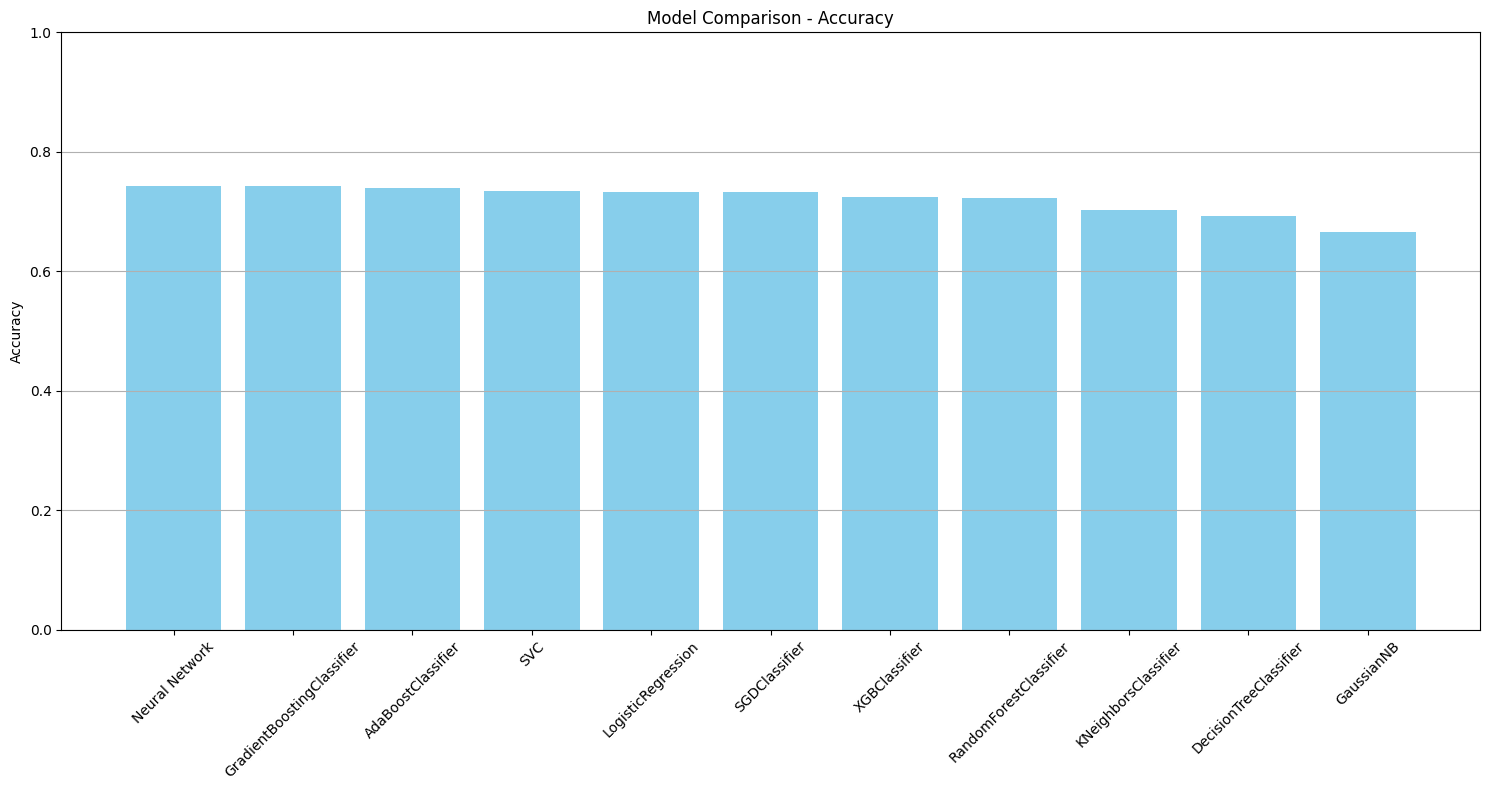

In [24]:
# Bar plot for Accuracy
plt.figure(figsize=(15, 8))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

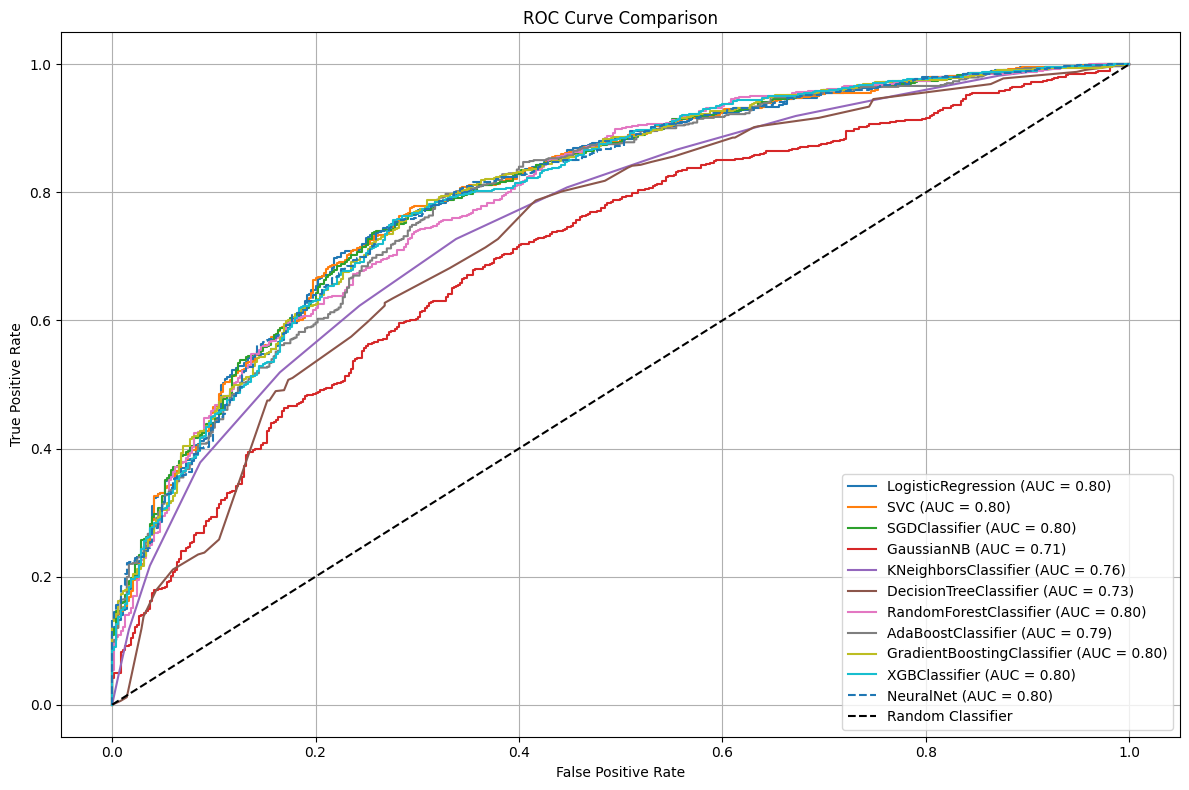

In [25]:
plt.figure(figsize=(12, 8))

# Loop through sklearn models
for name, grid in best_models.items():
    model = grid.best_estimator_
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# NN model (PyTorch)
pytorch_model.eval()
with torch.no_grad():
    y_logits = pytorch_model(X_test_torch)  # X_test is on CUDA
    y_probs = torch.sigmoid(y_logits).squeeze().cpu().numpy()  # move to CPU
    y_true = y_test_torch.squeeze().cpu().numpy()  # move to CPU

fpr_nn, tpr_nn, _ = roc_curve(y_true, y_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f"NeuralNet (AUC = {roc_auc_nn:.2f})", linestyle='--')

# Final plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
def get_feature_importance(model, X, y, feature_names):
    """
    Returns a DataFrame of feature importance for any fitted classifier.
    
    Parameters:
        model: trained classifier
        X: features (DataFrame or numpy array)
        y: target
        feature_names: list of feature names
    
    Returns:
        Pandas DataFrame sorted by importance
    """

    importance = []

    # Case 1: Tree-based models
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_

    # Case 2: Linear models (LogisticRegression, SGDClassifier, LinearSVC, etc.)
    elif hasattr(model, "coef_"):
        importance = np.abs(model.coef_[0])  # take abs to get magnitude

    # Case 3: Models without built-in importance → use permutation importance
    else:
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importance = result.importances_mean

    # Create DataFrame
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False).reset_index(drop=True)

    return importance_df

# Collect feature importances from all models
importance_dfs = []

for name, grid in best_models.items():
    model = grid.best_estimator_
    imp_df = get_feature_importance(model, X_train, y_train, feature_names=X_train.columns)
    imp_df = imp_df.set_index("Feature")
    imp_df.rename(columns={"Importance": name}, inplace=True)
    importance_dfs.append(imp_df)

# Combine all into one DataFrame, joining on feature names
combined_importance_df = pd.concat(importance_dfs, axis=1)

combined_importance_df


,LogisticRegression,SVC,SGDClassifier,GaussianNB,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Feature,,,,,,,,,,
losses_diff,0.831602,0.788750,0.713170,0.003986,0.035341,0.138707,0.108718,0.185353,0.117654,0.074137
wins_diff,0.743910,0.730526,0.637858,0.008916,0.021110,0.172205,0.104197,0.119827,0.120954,0.080784
sig_strikes_landed_diff,0.454917,0.441911,0.222611,0.001307,0.003043,0.030102,0.061203,0.024977,0.108097,0.132049
sig_strikes_standing_diff,0.421177,0.391957,0.214083,-0.000129,0.004201,0.004649,0.032687,0.051570,0.036853,0.081771
sig_strikes_attempted_diff,0.352946,0.272631,0.034939,-0.001179,0.000986,0.000000,0.024200,0.000000,0.015544,0.026941
knockdown_avg_diff,0.349479,0.320114,0.321643,0.005594,0.017767,0.049421,0.062354,0.078114,0.069265,0.048655
days_since_debut_diff,0.278975,0.312574,0.274835,0.004458,0.014852,0.094131,0.102831,0.115950,0.104462,0.069821
takedowns_attempted_diff,0.257946,0.236423,0.218369,0.004865,0.006065,0.041711,0.058322,0.051258,0.060360,0.056136
takedown_defense_diff,0.204968,0.154923,0.204515,0.004286,0.003901,0.027817,0.044354,0.063766,0.042577,0.039901


In [27]:
def get_pytorch_feature_importance(model, X, y, feature_names=None, n_repeats=5, metric=accuracy_score):
    """
    Compute permutation feature importance for a PyTorch model.
    
    Parameters:
        model: trained PyTorch model (in eval mode)
        X: torch.Tensor of shape (n_samples, n_features), on correct device
        y: torch.Tensor of shape (n_samples,), binary labels (0/1)
        feature_names: list of feature names, or None
        n_repeats: number of shuffles per feature
        metric: function to evaluate model performance (default accuracy)
        
    Returns:
        Pandas DataFrame with features and mean importance (performance drop)
    """
    model.eval()
    baseline_preds = torch.sigmoid(model(X)).squeeze().detach().cpu().numpy() >= 0.5
    baseline_score = metric(y.cpu().numpy(), baseline_preds)
    
    importances = []
    X = X.clone()  # don't modify original

    for i in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.clone()
            # Permute the i-th feature column
            idx = torch.randperm(X_permuted.size(0))
            X_permuted[:, i] = X_permuted[idx, i]
            
            with torch.no_grad():
                preds = torch.sigmoid(model(X_permuted)).squeeze().cpu().numpy() >= 0.5
            score = metric(y.cpu().numpy(), preds)
            scores.append(score)
        
        # Importance = drop in performance after permuting feature i
        mean_score = np.mean(scores)
        importances.append(baseline_score - mean_score)
    
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(X.shape[1])]
    
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).reset_index(drop=True)
    
    return importance_df

feature_names = X_train.columns.tolist()

importance_df = get_pytorch_feature_importance(
    pytorch_model,
    X_train_torch,  # already on device, tensor shape (n_samples, n_features)
    y_train_torch,  # tensor shape (n_samples,)
    feature_names=feature_names,
    n_repeats=10
)

importance_df

,Feature,Importance
0,wins_diff,0.084848
1,losses_diff,0.081633
2,sig_strikes_landed_diff,0.045992
3,days_since_debut_diff,0.025139
4,knockdown_avg_diff,0.017574
5,takedowns_attempted_diff,0.016331
6,takedown_defense_diff,0.014359
7,sig_strikes_ground_diff,0.011659
8,submission_avg_diff,0.011316
9,leg_target_diff,0.008851


In [28]:
# Assuming combined_importance_df is your existing DataFrame with sklearn model importances
# and importance_df is the one returned by get_pytorch_feature_importance

# Set 'Feature' as index for the PyTorch importance df
importance_df = importance_df.set_index("Feature")

# Rename the Importance column to "Neural Network"
importance_df.rename(columns={"Importance": "Neural Network"}, inplace=True)

# Merge with combined_importance_df on the index (Feature names)
combined_importance_df = combined_importance_df.join(importance_df, how='outer')

# Optionally, recompute mean importance including the new model
combined_importance_df["Mean Importance"] = combined_importance_df.mean(axis=1)

# Sort by mean importance descending
combined_importance_df = combined_importance_df.sort_values(by="Mean Importance", ascending=False)

combined_importance_df


,LogisticRegression,SVC,SGDClassifier,GaussianNB,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,Neural Network,Mean Importance
Feature,,,,,,,,,,,,
losses_diff,0.831602,0.788750,0.713170,0.003986,0.035341,0.138707,0.108718,0.185353,0.117654,0.074137,0.081633,0.279914
wins_diff,0.743910,0.730526,0.637858,0.008916,0.021110,0.172205,0.104197,0.119827,0.120954,0.080784,0.084848,0.256830
sig_strikes_landed_diff,0.454917,0.441911,0.222611,0.001307,0.003043,0.030102,0.061203,0.024977,0.108097,0.132049,0.045992,0.138746
days_since_debut_diff,0.278975,0.312574,0.274835,0.004458,0.014852,0.094131,0.102831,0.115950,0.104462,0.069821,0.025139,0.127094
knockdown_avg_diff,0.349479,0.320114,0.321643,0.005594,0.017767,0.049421,0.062354,0.078114,0.069265,0.048655,0.017574,0.121816
sig_strikes_standing_diff,0.421177,0.391957,0.214083,-0.000129,0.004201,0.004649,0.032687,0.051570,0.036853,0.081771,0.005015,0.113076
head_target_diff,0.058428,0.013097,0.171483,0.000300,0.000922,0.306649,0.154744,0.145000,0.101639,0.153546,0.007222,0.101185
takedowns_attempted_diff,0.257946,0.236423,0.218369,0.004865,0.006065,0.041711,0.058322,0.051258,0.060360,0.056136,0.016331,0.091617
sig_strikes_ground_diff,0.152848,0.171495,0.160559,0.005229,0.009194,0.065828,0.071403,0.041414,0.076084,0.104868,0.011659,0.079144


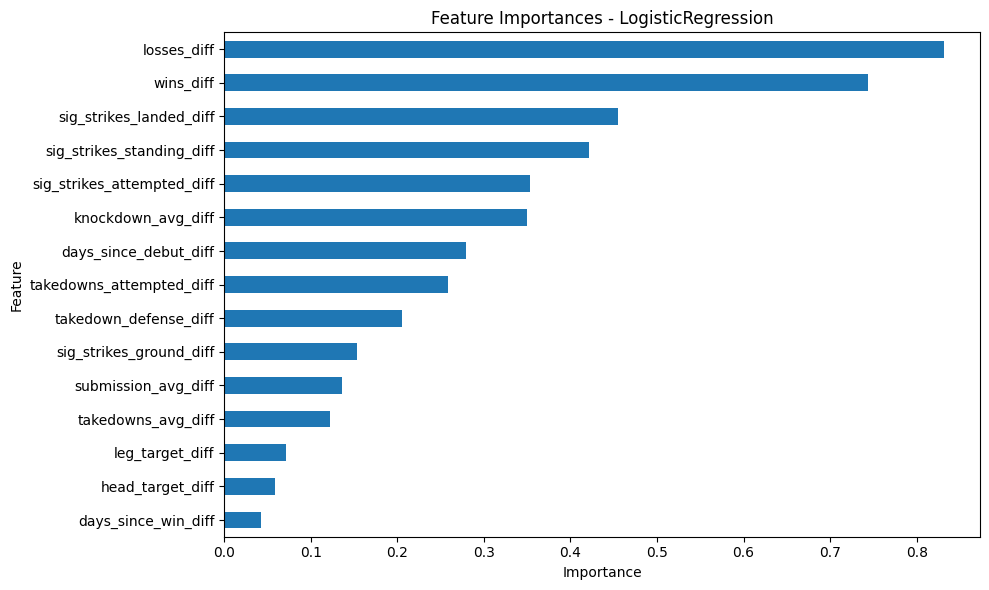

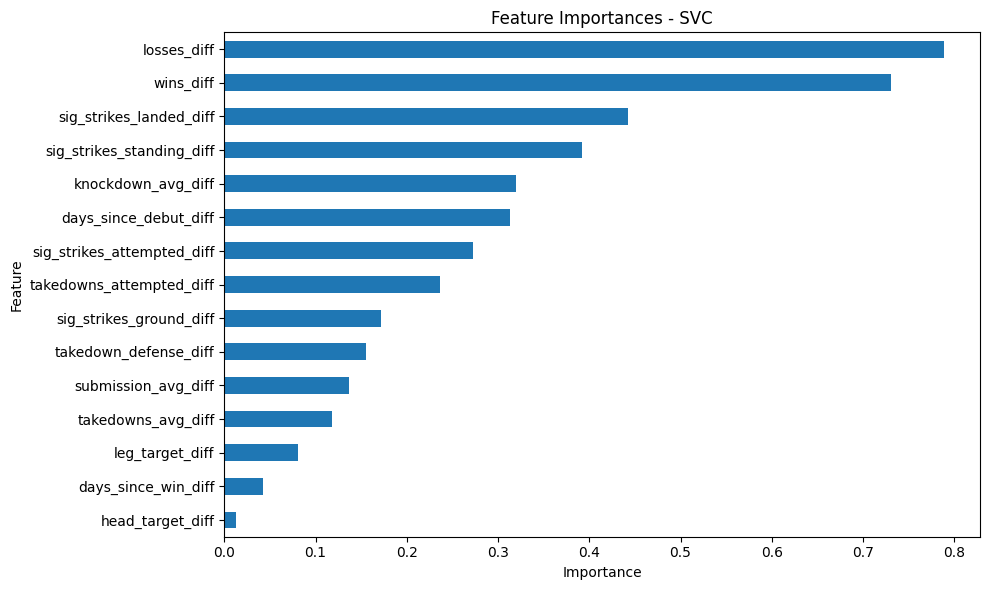

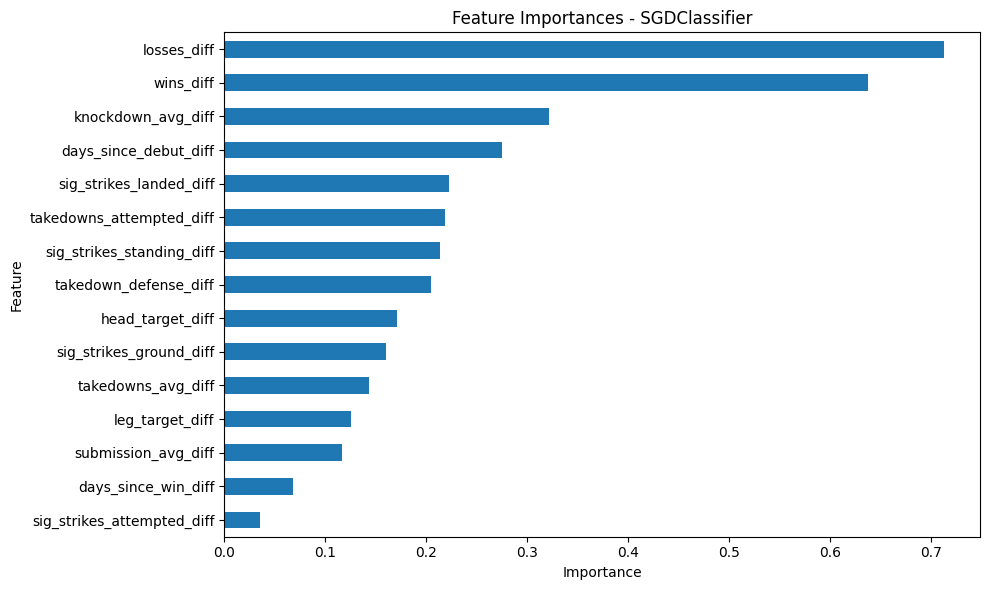

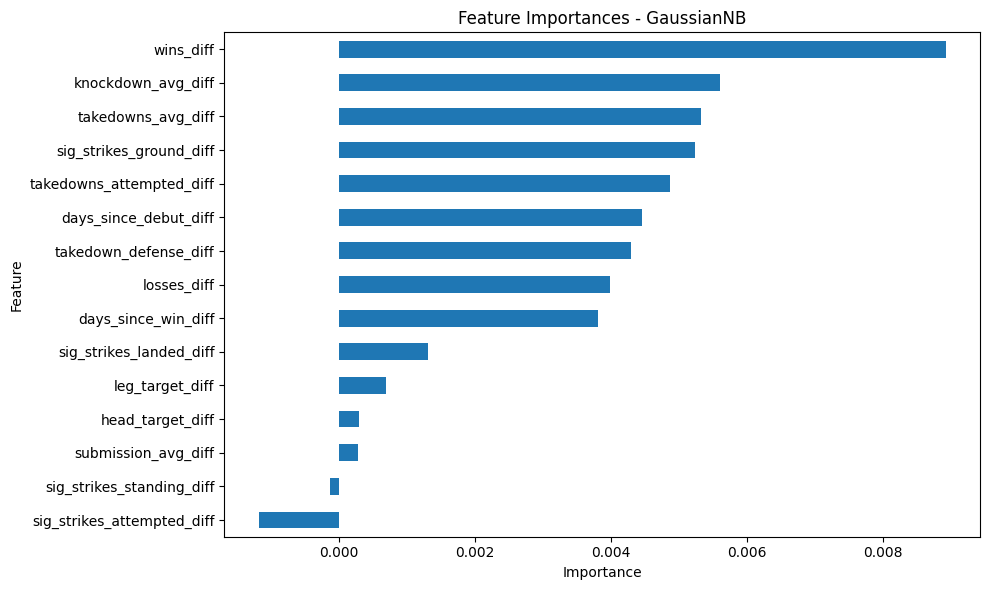

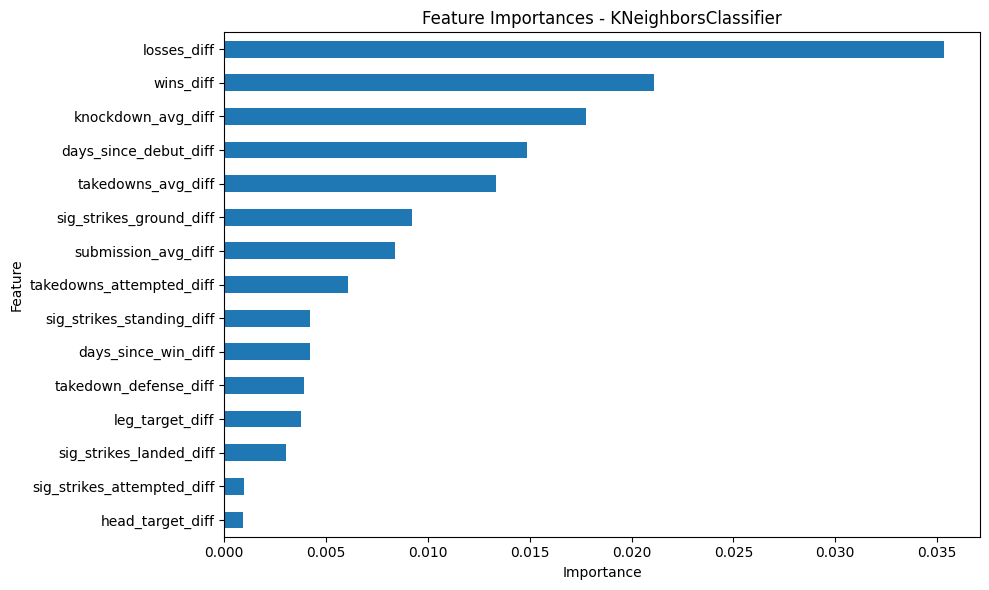

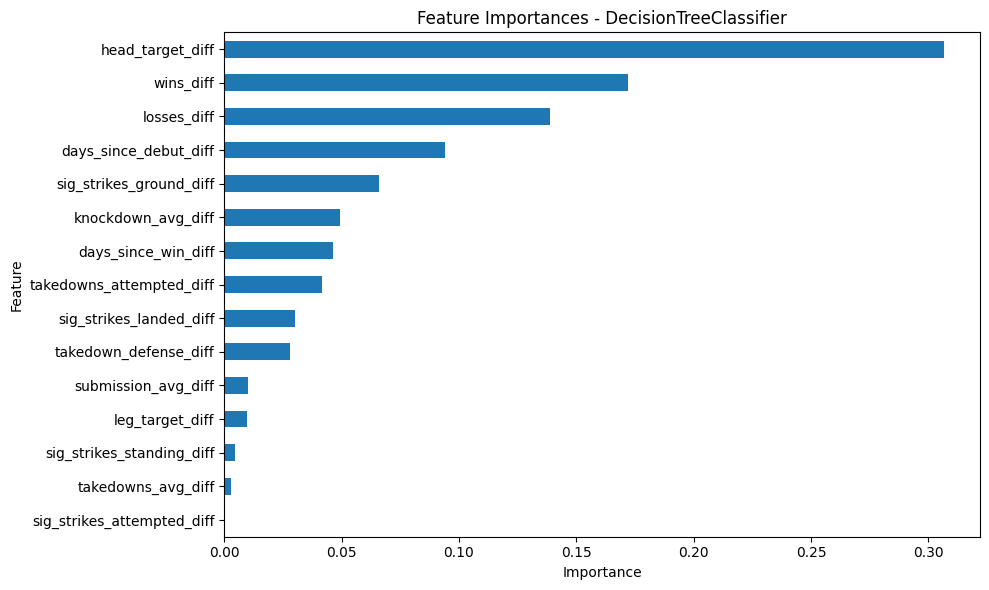

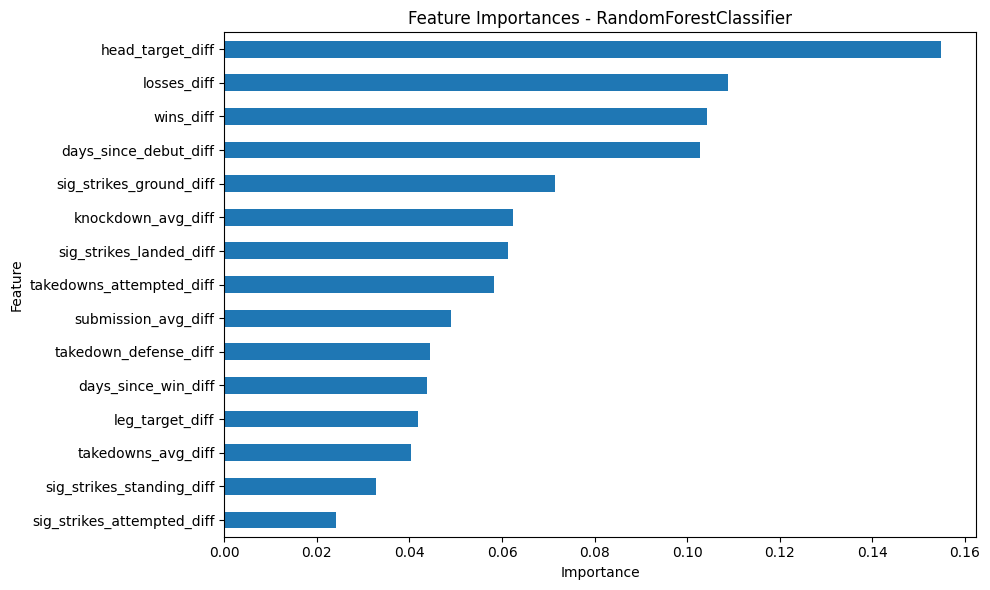

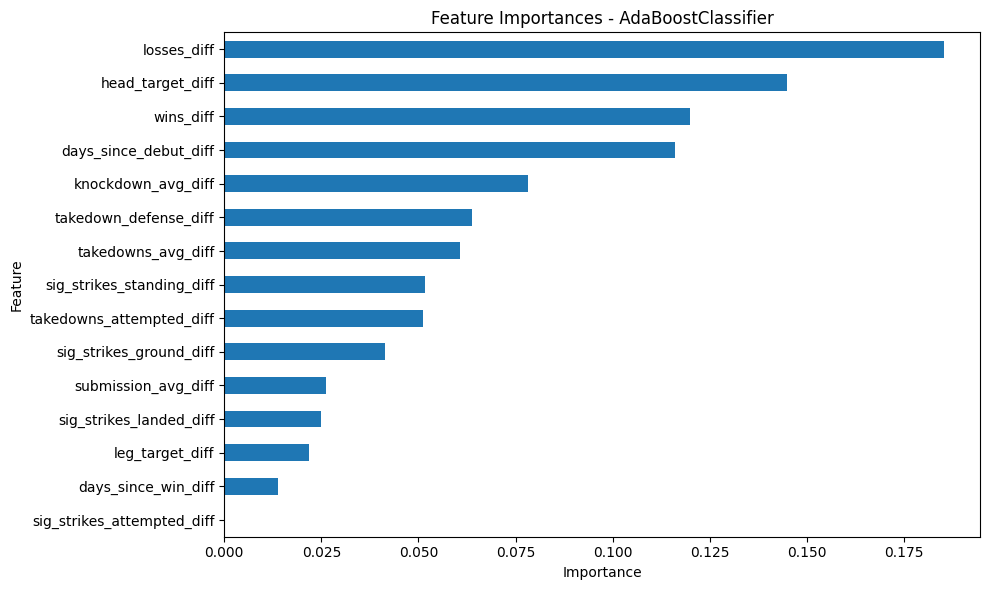

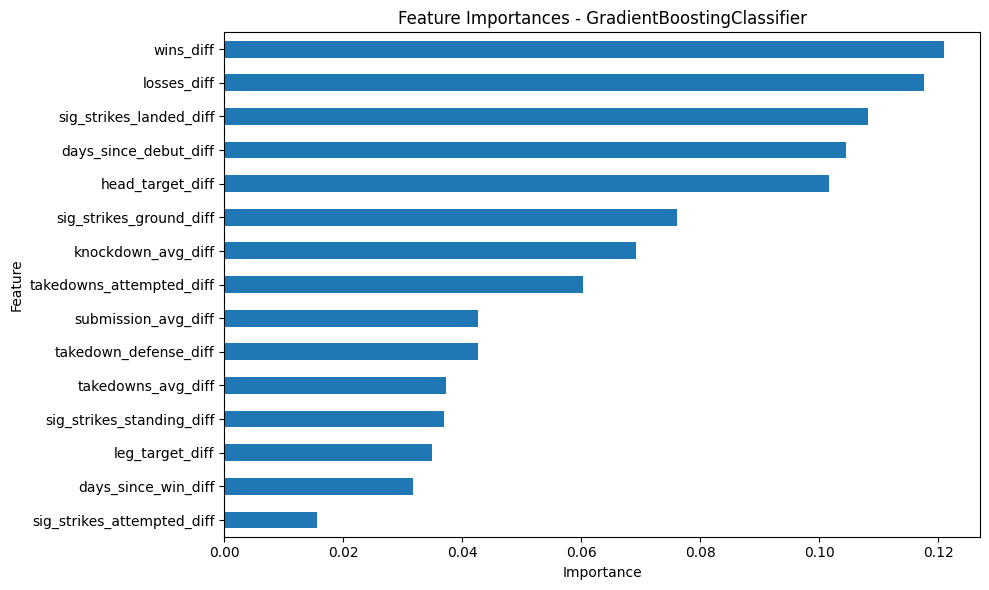

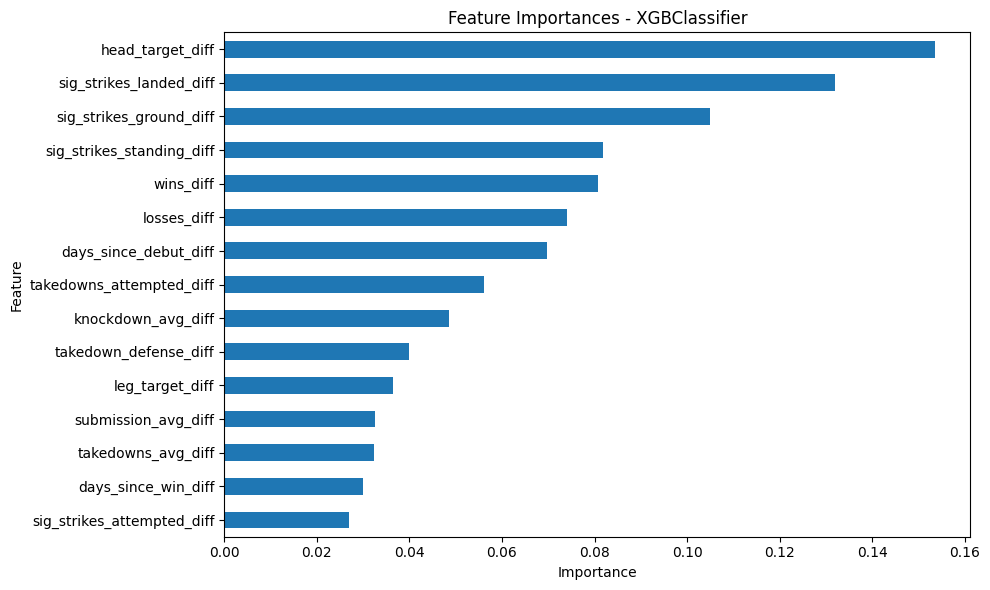

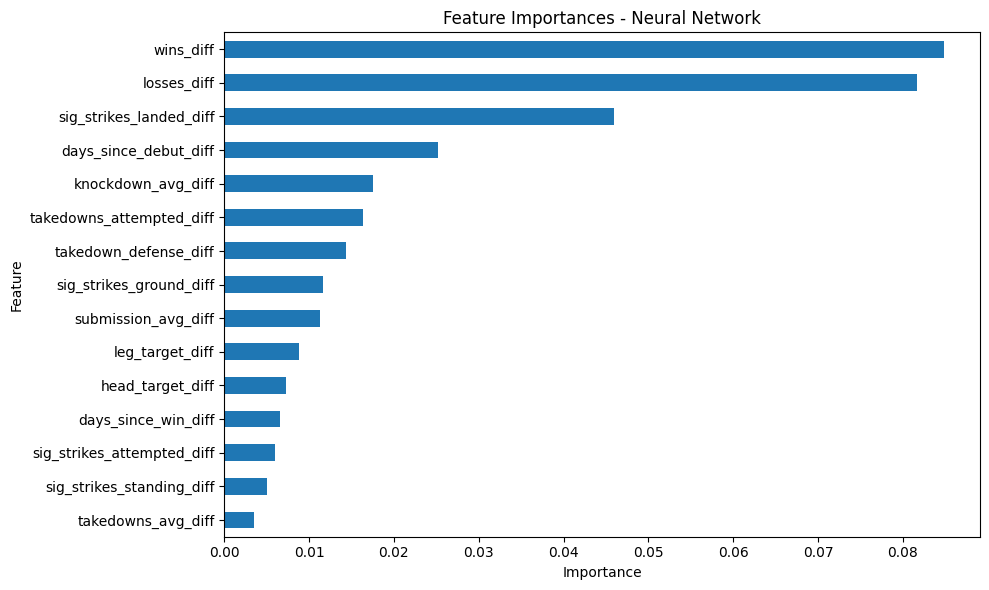

In [29]:
# Exclude 'Mean Importance' from the columns to plot
model_columns = [col for col in combined_importance_df.columns if col != "Mean Importance"]

for model_name in model_columns:
    plt.figure(figsize=(10, 6))
    combined_importance_df[model_name].sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Feature Importances - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
